In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split as tts
import datetime

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets
kn = neighbors.KNeighborsClassifier(15,weights='uniform')

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn import tree
dt = tree.DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [3]:
def miss():
    missing = merge.isnull().sum()
    print(missing[missing>0])

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

merge = train.append(test,ignore_index=True)
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [5]:
train['Survived'].value_counts()[1] # People who survived from train data set.

342

In [6]:
492 - train['Survived'].value_counts()[1] # This gives us remaining possible survivors for our model.

150

In [7]:
merge.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.178740,-0.150917,0.028814,-0.408106,-0.243699,-0.077221
Fare,0.178740,1.000000,0.221539,0.031428,-0.558629,0.160238,0.257307
Parch,-0.150917,0.221539,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.028814,0.031428,0.008942,1.000000,-0.038354,-0.055224,-0.005007
Pclass,-0.408106,-0.558629,0.018322,-0.038354,1.000000,0.060832,-0.338481
SibSp,-0.243699,0.160238,0.373587,-0.055224,0.060832,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


### Data Cleaning

In [8]:
import string
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if str.find(big_string, substring) != -1:
            return substring
    return np.nan

title_list = ['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
            'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
            'Don', 'Jonkheer']

merge['Title'] = merge['Name'].map(lambda x: substrings_in_string(x, title_list))

#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
merge['Title'] = merge.apply(replace_titles, axis=1)

merge.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [9]:
d = {'female':1, 'male':0}
merge['Sex'] = merge['Sex'].map(d)
merge.head(1)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.25,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,Mr


In [10]:
miss()

Age          263
Cabin       1014
Embarked       2
Fare           1
Survived     418
dtype: int64


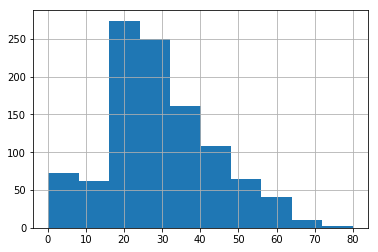

In [11]:
%matplotlib inline
merge['Age'].hist()

In [12]:
grp = merge.groupby('Title')['Age'].median() # use max to show kids
grp

Title
Master     4.0
Miss      22.0
Mr        30.0
Mrs       35.0
Name: Age, dtype: float64

In [13]:
merge.Age.fillna(0,inplace=True)

for i in range(len(merge)):
    if merge['Age'][i] == 0:
        if merge['Title'][i] == 'Master':
            merge['Age'][i] = grp[0]
        elif merge['Title'][i] == 'Miss':
            merge['Age'][i] = grp[1]
        elif merge['Title'][i] == 'Mr':
            merge['Age'][i] = grp[2]
        elif merge['Title'][i] == 'Mrs':
            merge['Age'][i] = grp[3]

C:\Users\New User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\New User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\New User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\New User\Anaconda3\lib\site-packages\ipykernel_launch

In [14]:
miss()

Cabin       1014
Embarked       2
Fare           1
Survived     418
dtype: int64


In [15]:
merge.Cabin.fillna('Unknown', inplace=True) # Fill in nan values with Unknown

merge['Deck'] = merge['Cabin'].map(lambda x: x[0]) # Creating Deck column with letter of each cabin.
merge.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Deck
0,22.0,Unknown,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,Mr,U
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,Mrs,C
2,26.0,Unknown,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,Miss,U
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,Mrs,C
4,35.0,Unknown,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,Mr,U


In [16]:
miss()

Embarked      2
Fare          1
Survived    418
dtype: int64


In [17]:
merge[merge['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Deck
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,1,0,1.0,113572,Miss,B
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,1,0,1.0,113572,Mrs,B


In [18]:
merge['Embarked'].mode()

0    S
dtype: object

In [19]:
merge.Embarked.fillna(merge['Embarked'].mode()[0], inplace=True)
miss()

Fare          1
Survived    418
dtype: int64


In [20]:
merge[merge['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Deck
1043,60.5,Unknown,S,NaN,"Storey, Mr. Thomas",0,1044,3,0,0,NaN,3701,Mr,U


In [21]:
merge.groupby(['Pclass','Embarked'])['Fare'].mean()

Pclass  Embarked
1       C           106.845330
        Q            90.000000
        S            72.235825
2       C            23.300593
        Q            11.735114
        S            21.206921
3       C            11.021624
        Q            10.390820
        S            14.435422
Name: Fare, dtype: float64

In [22]:
merge.Fare.fillna(merge.groupby(['Pclass','Embarked'])['Fare'].mean()[3][2],inplace=True)
miss()

Survived    418
dtype: int64


In [23]:
merge['Family_Size'] = merge['SibSp']+merge['Parch']

### Split Woman/Children and Men

In [24]:
df0 = merge.copy()
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
Deck           1309 non-null object
Family_Size    1309 non-null int64
dtypes: float64(3), int64(6), object(6)
memory usage: 153.5+ KB


In [25]:
del df0['Cabin']
del df0['Name']
del df0['Ticket']
del df0['Parch']
del df0['SibSp']

In [26]:
df0['Pclass'] = df0['Pclass'].astype(object)
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Age            1309 non-null float64
Embarked       1309 non-null object
Fare           1309 non-null float64
PassengerId    1309 non-null int64
Pclass         1309 non-null object
Sex            1309 non-null int64
Survived       891 non-null float64
Title          1309 non-null object
Deck           1309 non-null object
Family_Size    1309 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 102.3+ KB


In [27]:
columns = list(df0.columns)
columns

['Age',
 'Embarked',
 'Fare',
 'PassengerId',
 'Pclass',
 'Sex',
 'Survived',
 'Title',
 'Deck',
 'Family_Size']

In [28]:
mrs = df0[df0['Title']=='Mrs'][columns]
miss = df0[df0['Title']=='Miss'][columns]
mas = df0[df0['Title']=='Master'][columns]

In [29]:
wac0 = mrs.append(miss,ignore_index=True)
wac = wac0.append(mas,ignore_index=True)
wac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 10 columns):
Age            533 non-null float64
Embarked       533 non-null object
Fare           533 non-null float64
PassengerId    533 non-null int64
Pclass         533 non-null object
Sex            533 non-null int64
Survived       360 non-null float64
Title          533 non-null object
Deck           533 non-null object
Family_Size    533 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 41.7+ KB


In [30]:
men = df0[df0['Title']=='Mr'][columns]
men.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 1307
Data columns (total 10 columns):
Age            776 non-null float64
Embarked       776 non-null object
Fare           776 non-null float64
PassengerId    776 non-null int64
Pclass         776 non-null object
Sex            776 non-null int64
Survived       531 non-null float64
Title          776 non-null object
Deck           776 non-null object
Family_Size    776 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 66.7+ KB


### Create Dummies for wac

In [31]:
wacdummy = pd.get_dummies(wac,drop_first = True)
wacdummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 19 columns):
Age            533 non-null float64
Fare           533 non-null float64
PassengerId    533 non-null int64
Sex            533 non-null int64
Survived       360 non-null float64
Family_Size    533 non-null int64
Embarked_Q     533 non-null uint8
Embarked_S     533 non-null uint8
Pclass_2       533 non-null uint8
Pclass_3       533 non-null uint8
Title_Miss     533 non-null uint8
Title_Mrs      533 non-null uint8
Deck_B         533 non-null uint8
Deck_C         533 non-null uint8
Deck_D         533 non-null uint8
Deck_E         533 non-null uint8
Deck_F         533 non-null uint8
Deck_G         533 non-null uint8
Deck_U         533 non-null uint8
dtypes: float64(3), int64(3), uint8(13)
memory usage: 31.8 KB


### Create Dummies for men

In [32]:
mendummy = pd.get_dummies(men,drop_first = True)
mendummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 1307
Data columns (total 17 columns):
Age            776 non-null float64
Fare           776 non-null float64
PassengerId    776 non-null int64
Sex            776 non-null int64
Survived       531 non-null float64
Family_Size    776 non-null int64
Embarked_Q     776 non-null uint8
Embarked_S     776 non-null uint8
Pclass_2       776 non-null uint8
Pclass_3       776 non-null uint8
Deck_B         776 non-null uint8
Deck_C         776 non-null uint8
Deck_D         776 non-null uint8
Deck_E         776 non-null uint8
Deck_F         776 non-null uint8
Deck_T         776 non-null uint8
Deck_U         776 non-null uint8
dtypes: float64(3), int64(3), uint8(11)
memory usage: 50.8 KB


### Split Train and Test wac

In [33]:
wac = wacdummy.copy()
a = wac[wac['Survived']==1]
b = wac[wac['Survived']==0]
wactrain = a.append(b,ignore_index=True)
wactrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 19 columns):
Age            360 non-null float64
Fare           360 non-null float64
PassengerId    360 non-null int64
Sex            360 non-null int64
Survived       360 non-null float64
Family_Size    360 non-null int64
Embarked_Q     360 non-null uint8
Embarked_S     360 non-null uint8
Pclass_2       360 non-null uint8
Pclass_3       360 non-null uint8
Title_Miss     360 non-null uint8
Title_Mrs      360 non-null uint8
Deck_B         360 non-null uint8
Deck_C         360 non-null uint8
Deck_D         360 non-null uint8
Deck_E         360 non-null uint8
Deck_F         360 non-null uint8
Deck_G         360 non-null uint8
Deck_U         360 non-null uint8
dtypes: float64(3), int64(3), uint8(13)
memory usage: 21.5 KB


In [34]:
wactest = wac[wac['Survived'].isnull()]
wactest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 138 to 532
Data columns (total 19 columns):
Age            173 non-null float64
Fare           173 non-null float64
PassengerId    173 non-null int64
Sex            173 non-null int64
Survived       0 non-null float64
Family_Size    173 non-null int64
Embarked_Q     173 non-null uint8
Embarked_S     173 non-null uint8
Pclass_2       173 non-null uint8
Pclass_3       173 non-null uint8
Title_Miss     173 non-null uint8
Title_Mrs      173 non-null uint8
Deck_B         173 non-null uint8
Deck_C         173 non-null uint8
Deck_D         173 non-null uint8
Deck_E         173 non-null uint8
Deck_F         173 non-null uint8
Deck_G         173 non-null uint8
Deck_U         173 non-null uint8
dtypes: float64(3), int64(3), uint8(13)
memory usage: 11.7 KB


### Split Train and Test men

In [35]:
men = mendummy.copy()
c = men[men['Survived']==1]
d = men[men['Survived']==0]
mentrain = c.append(d,ignore_index=True)
mentrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 17 columns):
Age            531 non-null float64
Fare           531 non-null float64
PassengerId    531 non-null int64
Sex            531 non-null int64
Survived       531 non-null float64
Family_Size    531 non-null int64
Embarked_Q     531 non-null uint8
Embarked_S     531 non-null uint8
Pclass_2       531 non-null uint8
Pclass_3       531 non-null uint8
Deck_B         531 non-null uint8
Deck_C         531 non-null uint8
Deck_D         531 non-null uint8
Deck_E         531 non-null uint8
Deck_F         531 non-null uint8
Deck_T         531 non-null uint8
Deck_U         531 non-null uint8
dtypes: float64(3), int64(3), uint8(11)
memory usage: 30.7 KB


In [36]:
mentest = men[men['Survived'].isnull()]
mentest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 891 to 1307
Data columns (total 17 columns):
Age            245 non-null float64
Fare           245 non-null float64
PassengerId    245 non-null int64
Sex            245 non-null int64
Survived       0 non-null float64
Family_Size    245 non-null int64
Embarked_Q     245 non-null uint8
Embarked_S     245 non-null uint8
Pclass_2       245 non-null uint8
Pclass_3       245 non-null uint8
Deck_B         245 non-null uint8
Deck_C         245 non-null uint8
Deck_D         245 non-null uint8
Deck_E         245 non-null uint8
Deck_F         245 non-null uint8
Deck_T         245 non-null uint8
Deck_U         245 non-null uint8
dtypes: float64(3), int64(3), uint8(11)
memory usage: 16.0 KB


### Models for wac

In [37]:
ywac = wactrain['Survived']
Xwac = wactrain.drop(['PassengerId','Survived'],axis=1)
#del Xwac['PassengerId']
#del Xwac['Survived']

Xwactrain, Xwactest, ywactrain, ywactest = tts(Xwac, ywac, test_size=0.2, random_state=42)

In [38]:
ss = [kn, lr, dt, rf, gb]
name = ['K Neighbors', 'Logisitic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
Xwacres = wactest.drop(['PassengerId','Survived'],axis=1)
#del Xwacres['PassengerId']
#del Xwacres['Survived']

for i in range(len(ss)):
    ss[i] = ss[i].fit(Xwactrain, ywactrain)
    print(name[i])
    print('Accuracy of train is', ss[i].score(Xwactrain, ywactrain))
    print('Accuracy of test is', ss[i].score(Xwactest, ywactest))
    print('Error is', ((ss[i].score(Xwactrain, ywactrain)) - ss[i].score(Xwactest, ywactest))*100)
    ywacres = ss[i].predict(Xwacres)
    print('Number of survivors is', ywacres.sum())
    print(' ')

K Neighbors
Accuracy of train is 0.736111111111
Accuracy of test is 0.75
Error is -1.38888888889
Number of survivors is 156.0
 
Logisitic Regression
Accuracy of train is 0.8125
Accuracy of test is 0.888888888889
Error is -7.63888888889
Number of survivors is 145.0
 
Decision Tree
Accuracy of train is 0.996527777778
Accuracy of test is 0.791666666667
Error is 20.4861111111
Number of survivors is 134.0
 
Random Forest
Accuracy of train is 0.986111111111
Accuracy of test is 0.833333333333
Error is 15.2777777778
Number of survivors is 130.0
 
Gradient Boosting
Accuracy of train is 0.958333333333
Accuracy of test is 0.833333333333
Error is 12.5
Number of survivors is 142.0
 


In [39]:
ywacres = lr.predict(Xwacres)

### Models for men

In [40]:
ymen = mentrain['Survived']
Xmen = mentrain.drop(['PassengerId','Survived'],axis=1)

Xmentrain, Xmentest, ymentrain, ymentest = tts(Xmen, ymen, test_size=0.2, random_state=42)

In [41]:
ss = [kn, lr, dt, rf, gb]
name = ['K Neighbors', 'Logisitic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
Xmenres = mentest.drop(['PassengerId','Survived'],axis=1)

for i in range(len(ss)):
    ss[i] = ss[i].fit(Xmentrain, ymentrain)
    print(name[i])
    print('Accuracy of train is', ss[i].score(Xmentrain, ymentrain))
    print('Accuracy of test is', ss[i].score(Xmentest, ymentest))
    print('Error is', ((ss[i].score(Xmentrain, ymentrain)) - ss[i].score(Xmentest, ymentest))*100)
    ymenres = ss[i].predict(Xmenres)
    print('Number of survivors is', ymenres.sum())
    print(' ')

K Neighbors
Accuracy of train is 0.860849056604
Accuracy of test is 0.775700934579
Error is 8.51481220243
Number of survivors is 2.0
 
Logisitic Regression
Accuracy of train is 0.867924528302
Accuracy of test is 0.775700934579
Error is 9.22235937224
Number of survivors is 2.0
 
Decision Tree
Accuracy of train is 0.983490566038
Accuracy of test is 0.794392523364
Error is 18.9098042673
Number of survivors is 36.0
 
Random Forest
Accuracy of train is 0.955188679245
Accuracy of test is 0.738317757009
Error is 21.6870922236
Number of survivors is 17.0
 
Gradient Boosting
Accuracy of train is 0.931603773585
Accuracy of test is 0.766355140187
Error is 16.5248633398
Number of survivors is 11.0
 


In [42]:
ymenres = kn.predict(Xmenres)

### Results

In [ ]:
total = np.concatenate((ywacres,ymenres),axis=0)

In [ ]:
passId = wactest['PassengerId'].append(mentest['PassengerId'],ignore_index=True)

In [ ]:
result = pd.DataFrame({'PassengerId':passId,'Survived':total})
result['Survived'] = result['Survived'].astype(int)

In [ ]:
datetime.datetime.today()

Kaggle score was 0.79!